# Data Reduction 3

***
**Integration / Normalisation**

- 3 notebook for 20K samples (ASW - ASW_C2H6 - C2H6) + 1 notebook for higher T
- Perform for all Samples (xx/xx/2023)
***

## Imports

In [112]:
%matplotlib inline

import numpy 
import math
from math import isnan
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import cm
import matplotlib.colors as mcolors
import pandas as pd
import glob
from functools import reduce
import ipywidgets as widgets
import matplotlib.gridspec as gridspec
from datetime import datetime
from IPython.core.display import SVG
import re
import json

## Input Parameters

$\color{red}{\text{Implement manually !}}$

In [113]:
# 0.1 Date
date = "2020_09_15"

# 0.2 XP
XP = "XP_1-1"

# 0.3 Sample type
spl = "ASW"

# 0.4 Deposition Temperature
Tdep = "20"

# Colormap normalisation

# Be carefull because it may depend between the different samples

Tmin = 20
Tmax = 150


# Is there any Isotherm ?

Iso = False

# How do I deal with this now ?

# Load Data

Need to import DR2 Data and resplit into different range

Imprt data annex as well

In [114]:
# All_RAW_df

All_DR2_df = pd.read_csv("..\..\Data\DATA_PROCESSING\{}\Data\DR2_{}_All-scans.csv".format(date,date))

All_DR2_df = All_DR2_df.iloc[:,1:]

# data_annex

data_annex_df = pd.read_csv("..\..\Data\DATA_PROCESSING\{}\Data\DR2_{}_data_annex.csv".format(date,date))

data_annex_df = data_annex_df.iloc[:,1:]

# XP_list_test

XP_Ramp_df = pd.read_csv('..\..\Data\XP_list_test.csv')

XP_Ramp_df_date = XP_Ramp_df.loc[XP_Ramp_df['Date'] == date]
XP_Ramp_df_date2 = XP_Ramp_df_date.set_index("Date")
#XP_Ramp_df_date2
XP_Ramp_df_T = XP_Ramp_df_date2.T
#XP_Ramp_df_T
XP_Ramp_df_T_f = XP_Ramp_df_T.iloc[1: , :]
#XP_Ramp_df_T_f
XP_Ramp_df_T_f2=XP_Ramp_df_T_f.dropna()
XP_Ramp_df_T_f2

# Produce dictionnary

Tdictionary = dict(zip(XP_Ramp_df_T_f2.index, XP_Ramp_df_T_f2[date]))

## Data Cleaning

### Chopping

In [115]:
# OH Stretch

dataA_BC = All_DR2_df[4150:6639]
#DR1_A_df

# Combination Bands

dataB_BC = All_DR2_df[2282:4150]
#DR1_B_df

# Bending Modes

dataC_BC = All_DR2_df[0:2282]

dataC_BC_U = dataC_BC.drop(dataC_BC.index[0:498])
#DR1_C_df

In [116]:
dataA_BC

,Wavenumber,ASW_2020_09_15_1,ASW_2020_09_15_2,ASW_2020_09_15_3,ASW_2020_09_15_4
4150,2800.660,-0.000132,0.000136,0.000351,0.000303
4151,2801.142,-0.000193,-0.000019,0.000000,0.000090
4152,2801.624,-0.000125,0.000169,0.000470,0.000409
4153,2802.106,-0.000179,0.000047,0.000165,0.000248
4154,2802.589,-0.000105,0.000314,0.000669,0.000454
...,...,...,...,...,...
6634,3998.257,0.000151,0.000688,0.000876,0.000556
6635,3998.739,0.000183,0.000399,0.000554,0.000626
6636,3999.221,0.000101,0.000000,0.000000,0.000436
6637,3999.703,0.000105,0.000750,0.000746,0.000190


## 3.1 <u>Integration</u> 

In the following we are going to integrate the spectra between two borns with the trapezoidal integration technique

### Function definition

In [117]:
# this function computes the inegral of the scan of index index, between borns 1 and 2 (in cm-1)

def integration(index, data, wavelength, born_1, born_2):

    nwl = len(wavelength) #number of wavelenght - spectra resolution

    list_names =  list(data.columns.values.tolist())
    
    scan_place = 0
    
    for i in range(len(list_names)):
        
        name_corr = list_names[i].split('_')
        
        if int(name_corr[-1]) == index:
    
            scan_place = i
    
    scan = data.T.iloc[scan_place]
        
    index_born_1 = 0
    index_born_2 = 0
    
    for iwl in range(nwl):
        
        if abs(wavelength[iwl] - born_1) < 0.5:
            
            index_born_1 = iwl
    
        elif abs(wavelength[iwl] - born_2) < 0.5:
            
            index_born_2 = iwl
    
    area = 0
    
    for iint in range(index_born_1, index_born_2):
        
        d_area = 0.5*(scan[iint]+scan[iint+1])*(wavelength[iint+1]-wavelength[iint])
    
        area = area + d_area
        
    return area

### 3.1.A Oh stretch

In [118]:
#range A
wavelengthA = dataA_BC.T.iloc[0]
wavelengthA = wavelengthA.reset_index(drop=True)

In [119]:
#wavelengthA

In [120]:
#range A
dataA_BC_I = dataA_BC.T.iloc[1:].T
dataA_BC_I = dataA_BC_I.reset_index(drop=True)

In [121]:
dataA_BC_I

,ASW_2020_09_15_1,ASW_2020_09_15_2,ASW_2020_09_15_3,ASW_2020_09_15_4
0,-0.000132,0.000136,0.000351,0.000303
1,-0.000193,-0.000019,0.000000,0.000090
2,-0.000125,0.000169,0.000470,0.000409
3,-0.000179,0.000047,0.000165,0.000248
4,-0.000105,0.000314,0.000669,0.000454
...,...,...,...,...
2484,0.000151,0.000688,0.000876,0.000556
2485,0.000183,0.000399,0.000554,0.000626
2486,0.000101,0.000000,0.000000,0.000436
2487,0.000105,0.000750,0.000746,0.000190


In [122]:
nscan = len(list(dataA_BC_I.columns.values.tolist()))

areas = numpy.zeros(nscan)
areasBCA = numpy.zeros(nscan)

times = numpy.zeros(nscan)

for iint in range(0, nscan):
    
    #areas[iint] = integration(iint+1, data, wavelength, 2900, 3900)
    areasBCA[iint] = integration(iint+1, dataA_BC_I, wavelengthA, 2800, 4000)
    #times[iint] = 15*iint
    

In [123]:
areasBCA

array([ 96.29207835, 111.47014325, 112.35891814,  53.70079377])

### 3.1.B Bending Modes

In [124]:
#range C (think to supress libration mode contribution!)
wavelengthC = dataC_BC_U.T.iloc[0]
wavelengthC = wavelengthC.reset_index(drop=True)

In [125]:
wavelengthC

0       1039.942
1       1040.424
2       1040.906
3       1041.389
4       1041.871
          ...   
1779    1897.641
1780    1898.123
1781    1898.605
1782    1899.088
1783    1899.570
Name: Wavenumber, Length: 1784, dtype: float64

In [126]:
#range C
dataC_BC_I = dataC_BC_U.T.iloc[1:].T
dataC_BC_I = dataC_BC_I.reset_index(drop=True)

In [127]:
dataC_BC_I

,ASW_2020_09_15_1,ASW_2020_09_15_2,ASW_2020_09_15_3,ASW_2020_09_15_4
0,0.000193,1.523235e-03,0.003253,2.753807e-04
1,0.000331,5.166573e-04,0.002361,2.507645e-04
2,0.000358,1.360469e-03,0.003796,3.325964e-04
3,0.000436,2.549009e-04,0.001724,3.245892e-04
4,0.000398,1.101433e-03,0.003059,3.797860e-04
...,...,...,...,...
1779,0.000098,7.667428e-04,0.000443,6.985174e-04
1780,0.000131,8.584186e-04,0.001026,1.369116e-03
1781,0.000045,3.926974e-04,0.000037,-4.336809e-19
1782,0.000059,3.875322e-04,0.000835,9.535338e-04


In [128]:
nscan = len(list(dataC_BC_I.columns.values.tolist()))

areas = numpy.zeros(nscan)
areasBCC = numpy.zeros(nscan)

times = numpy.zeros(nscan)

for iint in range(0, nscan):
    
    #areas[iint] = integration(iint+1, data, wavelength, 2900, 3900)
    areasBCC[iint] = integration(iint+1, dataC_BC_I, wavelengthC, 1040, 1900)
    #times[iint] = 15*iint
    

In [129]:
areasBCC

array([6.70362203, 7.6222642 , 8.42393636, 4.0100989 ])

### 3.1.4 Clean 

In [130]:
#range A

areasBCA_df = pd.DataFrame({ 'File number': dataA_BC_I.iloc[0,:], 'Int_A': areasBCA[:]})
areasBCA_df = areasBCA_df.T.iloc[1:].T

areasBCA_df = areasBCA_df.reset_index()
areasBCA_df['Name'] = areasBCA_df['index']
areasBCA_df= areasBCA_df.T.iloc[1:].T

#range C

areasBCC_df = pd.DataFrame({ 'File number': dataC_BC_I.iloc[0,:], 'Int_C': areasBCC[:]})
areasBCC_df = areasBCC_df.T.iloc[1:].T

areasBCC_df = areasBCC_df.reset_index()
areasBCC_df['Name'] = areasBCC_df['index']
areasBCC_df= areasBCC_df.T.iloc[1:].T

In [131]:
#areasBCA_df
#areasBCC_df

### 3.1.5 Append to data Annex

In [132]:
data_annex_df = pd.merge(data_annex_df, areasBCA_df, on="Name")
data_annex_df = pd.merge(data_annex_df, areasBCC_df, on="Name")


In [133]:
data_annex_df

,Name,min1,index1,min2,index2,min3,index3,min4,index4,min5,...,maxA0,maxA0w,maxBi,maxB,maxBw,maxCi,maxC,maxCw,Int_A,Int_C
0,ASW_2020_09_15_1,-0.017293,6630,-0.009476,4293,-0.009151,4147,0.001203,2482,0.001967,...,0.277977,3270.249,2936,0.008422,2215.361,1777,0.022221,1656.579,96.292078,6.703622
1,ASW_2020_09_15_2,-0.017489,6636,-0.008995,4161,-0.009001,4132,0.002430,2480,0.003482,...,0.395890,3246.143,2976,0.012062,2234.646,1754,0.021662,1645.490,111.470143,7.622264
2,ASW_2020_09_15_3,-0.017849,6636,-0.009715,4151,-0.009664,4132,0.001595,2463,0.003063,...,0.400649,3233.125,2974,0.012331,2233.682,1691,0.021226,1615.116,112.358918,8.423936
3,ASW_2020_09_15_4,-0.006971,6630,-0.004298,4149,-0.004222,4120,0.002220,2473,0.002968,...,0.203090,3228.304,2976,0.006884,2234.646,1574,0.013023,1558.708,53.700794,4.010099


### 3.1.6 Plotting

#### Dict values

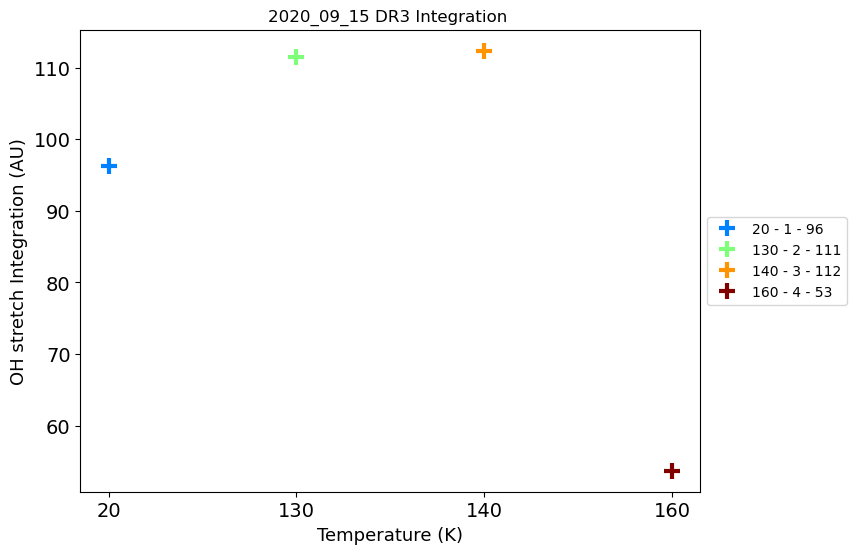

In [134]:
fig= plt.figure(figsize=(8,6))

for keys, values in Tdictionary.items():
    
    #temp = int(keys)
    scan = json.loads(values)

    normalize = mcolors.Normalize(vmin=Tmin, vmax=Tmax)
    colormap = cm.jet
    
    for i in scan:


        plt.plot(keys, data_annex_df.iloc[i-1,28], '+', mew=3, ms=12, c=cm.jet(i/nscan),label= str(keys)+" - "+str(i)+" - "+str(int(data_annex_df.iloc[i-1,28])))    

plt.title('{0} DR3 Integration '.format(date))
#plt.axis([3210,3270])
plt.xlabel('Temperature (K)').set_fontsize(13)
plt.ylabel('OH stretch Integration (AU)').set_fontsize(13)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
#ax = fig.gca()
#plt.grid()
plt.legend()
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))


plt.savefig('..\..\Data\DATA_PROCESSING\{}\Plots\DR2_{}_PeakA-Integration.png'.format(date, date))

plt.show()

#### Dict values

In [135]:
if Iso == True:   
    
    fig= plt.figure(figsize=(8,6))

    for keys, values in Isodic1.items():

        plt.plot(keys, data_anex_df.iloc[values,28], '+', mew=3, ms=12, c=cm.jet(values/nscan),label= str(keys)+" - "+str(values+1)+" - "+str(int(data_anex_df.iloc[values,28])))    

    plt.title('{0} DR3 Integration Iso {1}  '.format(date, Tiso1))
    #plt.axis([3210,3270])
    plt.xlabel('Time (h)').set_fontsize(13)
    plt.ylabel('OH stretch Integration (AU)').set_fontsize(13)
    ax = fig.gca()
    ax.xaxis.set_major_locator(plt.MaxNLocator(10))  
    #plt.grid()
    #plt.legend()


    plt.savefig('D:\DATA-Processing\PAC\{}/Samples/{}/Plots/DR/DR2_{}_PeakA-Integration_Iso_{}.png'.format(XP, date, date, Tiso1))

    plt.show()

## 3.2 <u>Column Density Calculation </u>

### 3.2.1 Theory

To do

### 3.2.2 Normalisation factor

Dep_val_A correspond to the first value found in the column Int_A or C. This corrspond to the integration for from the deposition for all the samples

In [86]:
Dep_val_A = data_annex_df['Int_A'].values[0]

Dep_val_C = data_annex_df['Int_C'].values[0]

In [87]:
#Dep_val_A 
#Dep_val_C

### 3.3 Optical depth Calcul

### 3.3.A Oh stretch

Aa taken from ref ... Hagen 1981

Find more recent value

In [88]:
Aa = 2 * 10**(-16)

In [89]:
NA = Dep_val_A / Aa

In [90]:
#NA

### 3.3.B Oh bend

In [91]:
Ac = 1.2 * 10**(-17)

In [92]:
NC = Dep_val_C / Ac

In [93]:
#NC

### 3.3.C Comparison and analysis

In [94]:
comp = NA/NC * 100

In [95]:
comp

86.18512009467001

### 3.3.E Append to Ice_thickness_df

Prior to the Reduction analysis, the laser-diode thickness notebook should have been performed and a csv being producing with he inputs. We will append the previously obtained data into this csv

In [105]:
Ice_thickness_df = pd.read_csv('..\..\Data\Ice_thickness.csv')

In [106]:
Ice_thickness_df

,Sample,Date,n1,teta1,d,rate,thickness,Na,Nc,NormF,Unnamed: 10
0,ASW,2020_09_15,0.993048,20.146063,339.379074,0.755029,906.035050,4.814604e+17,5.586352e+17,NaN,NaN
1,ASW,2020_09_16,0.987391,20.266541,341.587806,0.919652,1103.582241,NaN,NaN,NaN,NaN


In [98]:
Ice_thickness_df.loc[Ice_thickness_df["Date"] == date, 'Na'] = NA 
Ice_thickness_df.loc[Ice_thickness_df["Date"] == date, 'Nc'] = NC 

In [104]:
Ice_thickness_df

,Sample,Date,n1,teta1,d,rate,thickness,Na,Nc,Unnamed: 9,Unnamed: 10
0,ASW,2020_09_15,0.993048,20.146063,339.379074,0.755029,906.035050,4.814604e+17,5.586352e+17,NaN,NaN
1,ASW,2020_09_16,0.987391,20.266541,341.587806,0.919652,1103.582241,NaN,NaN,NaN,NaN


## 3.3 <u> Normalisation </u>

2 different normalisations
- The 20K sample can be normalised with the first scan (ie the deposition)
- The sample deposited at the higher T needs to be with normalised with respect to the Integration from the normalized scan (3.3?)  

### 20K depositions

For 20K deposition no problem, we take the Integration value of the deposition and normalised through it

Insert if statement: if TRamp[:3] not Nan continue otherwise don`t perform normalisation

In [101]:
#Dep_val_A

 $\color{red}{\text{Here we need to have a if statement that say that if the sample is deposited at 20K - norm factor = 100 / Dep_val_A, else, another notebook is run to get the Norm factor at the temperature of interest!}}$

In [102]:
if Tdep == "20":

    
    NormFactor = 100 / Dep_val_A
    print(NormFactor)
    
else:

    %run -i "HighTreduction.py"
    print(mean_X)
    NormFactor = mean_X / Dep_val_A

1.0385070268819834


In [103]:
#NormFactor

 $\color{red}{\text{Append Norm factor into sample thick csv}}$

In [107]:
Ice_thickness_df.loc[Ice_thickness_df["Date"] == date, 'NormF'] = NormFactor

In [108]:
Ice_thickness_df.to_csv('..\..\Data\Ice_thickness.csv', index=False)

# Normalisation 

In [109]:
dataA_N = dataA_BC_I * NormFactor

Saanity Check:
    
- Insert wavenumber (before export)

In [110]:
dataA_N.insert(loc = 0,
          column = 'Wavenumber',
          value =  wavelengthA)

dataA_N

,Wavenumber,ASW_2020_09_15_1,ASW_2020_09_15_2,ASW_2020_09_15_3,ASW_2020_09_15_4
0,2800.660,-0.000137,0.000142,0.000364,0.000315
1,2801.142,-0.000201,-0.000020,0.000000,0.000093
2,2801.624,-0.000130,0.000175,0.000488,0.000425
3,2802.106,-0.000186,0.000049,0.000172,0.000258
4,2802.589,-0.000109,0.000326,0.000695,0.000471
...,...,...,...,...,...
2484,3998.257,0.000156,0.000714,0.000909,0.000577
2485,3998.739,0.000190,0.000414,0.000575,0.000651
2486,3999.221,0.000105,0.000000,0.000000,0.000453
2487,3999.703,0.000109,0.000779,0.000774,0.000197


# Plotting

## Export as csv

In [111]:
dataA_N.to_csv("..\..\Data\DATA_PROCESSING\{}\Data\DR3_{}_A.csv".format(date,date))

## 3.4 <u>Integration II</u> 

Purpose here is to integrate the normalised scan so we can have integration value for scans at higher temperature to use as normalisation value for scans deposited at higherrt temperature

In [ ]:
#dataA_N

Supress wavenumber

In [ ]:
dataA_N = dataA_N.T.iloc[1:].T

#dataA_N

In [ ]:
nscan = len(list(dataA_N.columns.values.tolist()))

areas = numpy.zeros(nscan)
areasBCA2 = numpy.zeros(nscan)

times = numpy.zeros(nscan)

for iint in range(0, nscan):
    
    #areas[iint] = integration(iint+1, data, wavelength, 2900, 3900)
    areasBCA2[iint] = integration(iint+1, dataA_N, wavelengthA, 2800, 4000)
    #times[iint] = 15*iint
    

In [ ]:
areasBCA2

In [ ]:
areasBCA2_df = pd.DataFrame({ 'File number': dataA_BC_I.iloc[0,:], 'Int_N_A': areasBCA2[:]})
areasBCA2_df = areasBCA2_df.T.iloc[1:].T
areasBCA2_df = areasBCA2_df.reset_index()
areasBCA2_df['Name'] = areasBCA2_df['index']
areasBCA2_df= areasBCA2_df.T.iloc[1:].T

In [ ]:
#areasBCA2_df

In [ ]:
data_anex_df = pd.merge(data_anex_df, areasBCA2_df, on="Name")

### High Temperature deposition

For the higher temperature deposited, normalising through the deposition would not allowed a good comparison with the sample deposited at 20K. Hence, we will make an average of the normalised value (from Integration II) at the temperature of interest and use this value as a normalisation factor.<br>

We will use a separate notebook to to that that will run separately if need be

## Export data_Anex as csv

In [ ]:
data_anex_df.to_csv("D:\DATA-Processing\PAC\{}/Samples/{}/Data/DR/{}_data_annex.csv".format(XP,date,date), index=False)

***

<img style="float: right;" src="..\..\Docs\Logo_work_in_progress.svg" alt="logo" width="160px"/>

## About this notebook

**Updated On:** 2023-03-15 


**Author:** Vincent Deguin, PhD Student.
<br>
 **Contact:** vincent.deguin@open.ac.uk  